In [8]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from six.moves import cPickle
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import xavier_initializer
import shutil

from PIL import Image
% matplotlib inline

In [9]:
# optional for multi-gpu

# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = '3'

In [10]:
style1 =  cPickle.load(open('./data/style.pkl', 'rb'))
style2 =  cPickle.load(open('./data/style2.pkl', 'rb'))
style3 =  cPickle.load(open('./data/style3.pkl', 'rb'))

content1 =  cPickle.load(open('./data/content.pkl', 'rb'))
content2 =  cPickle.load(open('./data/content2.pkl', 'rb'))
content3 =  cPickle.load(open('./data/content3.pkl', 'rb'))

style1= style1.reshape(1, 450, 450, 3)
style2 = style2.reshape(1, 450, 450, 3)
style3= style3.reshape(1, 450, 450, 3)

content1= content1.reshape(1 ,450, 450, 3)
content2 = content2.reshape(1, 450, 450, 3)
content3= content3.reshape(1, 450, 450, 3)

content1 = content1.astype(float)
content2 = content2.astype(float)
content3 = content3.astype(float)

style1 = style1.astype(float)
style2 = style2.astype(float)
style3 = style3.astype(float)

style1u = style1.astype(np.uint8)
style2u = style2.astype(np.uint8)
style3u = style3.astype(np.uint8)

content1u = content1.astype(np.uint8)
content2u = content2.astype(np.uint8)
content3u = content3.astype(np.uint8)

content4 = Image.open("./data/abathur.jpg")
content4 = content4.resize((450, 450))
content4 = np.array(content4).reshape(1, 450, 450, 3)

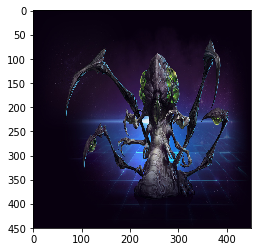

In [11]:
plt.imshow(content4[0])
plt.show()

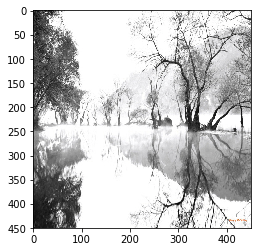

In [12]:
plt.imshow(style1u[0])
plt.show()

In [13]:
config = {
    'ID' : 'test_StyleTransfer6',
    'n_iter' : 1000,
    'n_prt' : 200,
    'input_h' : 450,
    'input_w' : 450,
    'input_ch' : 3,
    'style' : style1,
    'content' : content4,
    'init_img' : None,
    's1' : 'conv2_1',
    's2' : 'conv3_1',
    'c1' : 'conv4_1',
    'c2' : 'conv5_1',
    'alpha' : 1e-4, # content parameter
    'beta' : 1e-15, # style parameter
    'noise_weight' : 2,
    'n_save' : 1000,
    'n_history' : 50,
    'LR' : 5
}

In [14]:
from model.StyleTransfer import StyleTransfer

In [15]:
styleNet = StyleTransfer(config)


Content loss (200/1000) : 3096.4267578125
Style loss (200/1000) : 1395.52880859375
Noise loss (200/1000) : 2357.09619140625



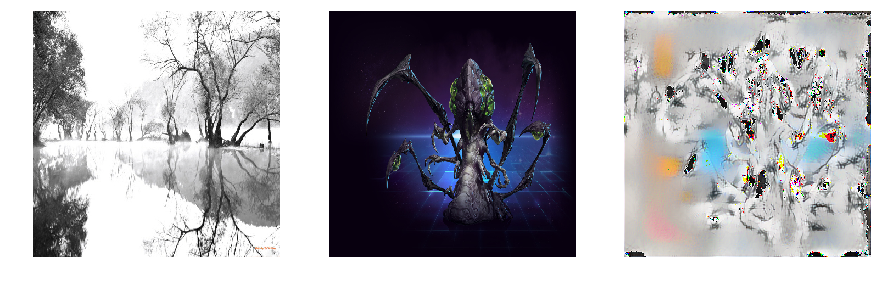


Content loss (400/1000) : 2215.301025390625
Style loss (400/1000) : 637.09716796875
Noise loss (400/1000) : 2239.993896484375



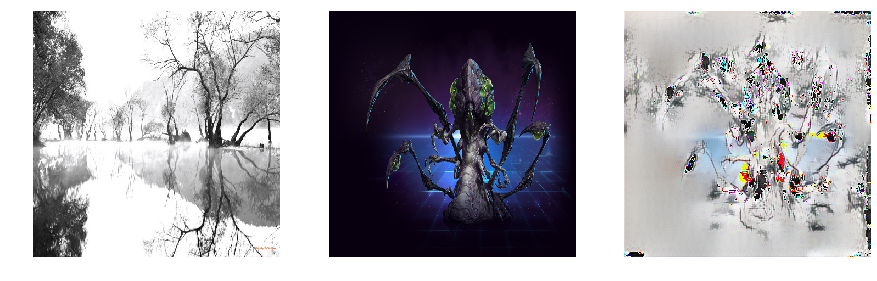


Content loss (600/1000) : 2009.2567138671875
Style loss (600/1000) : 579.5572509765625
Noise loss (600/1000) : 2227.68017578125



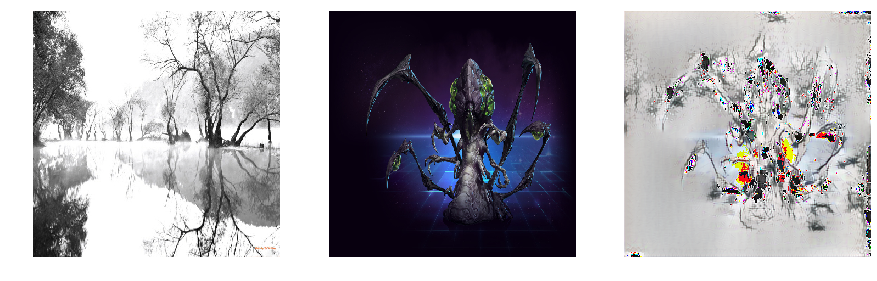


Content loss (800/1000) : 1922.852294921875
Style loss (800/1000) : 559.4916381835938
Noise loss (800/1000) : 2222.366455078125



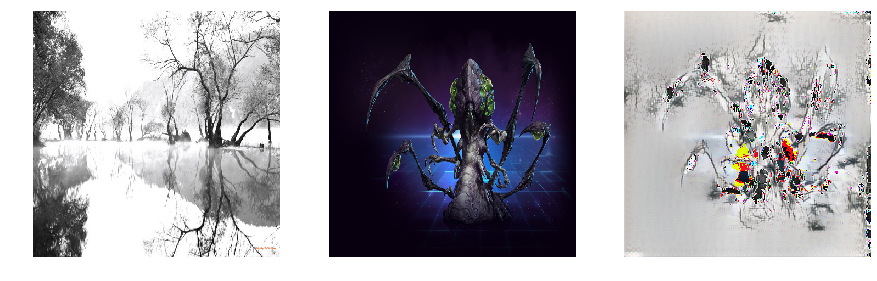


Content loss (1000/1000) : 1867.247314453125
Style loss (1000/1000) : 550.3052978515625
Noise loss (1000/1000) : 2218.889404296875



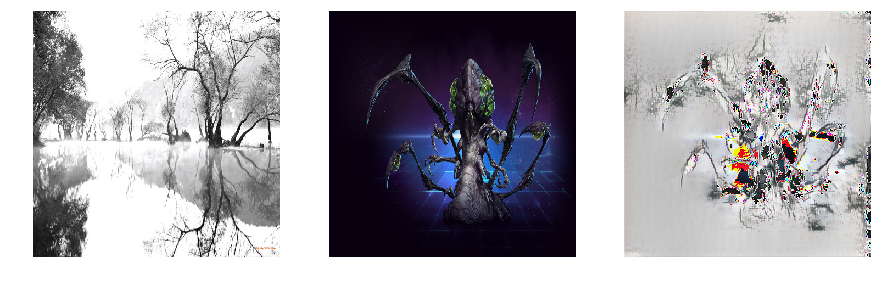

INFO:tensorflow:./test_StyleTransfer6/checkpoint/test_StyleTransfer6_1000 is not in all_model_checkpoint_paths. Manually adding it.


In [16]:
styleNet.fit(verbose = True)

# debug

In [ ]:
# tmp = styleNet.sess.run(styleNet.input_x)

# tmp.shape

# plt.imshow(tmp[0])
# plt.show()

# plt.imshow(tmp[0].astype(np.uint8))
# plt.show()

# plt.imshow(np.clip(tmp[0].astype(np.uint8), 0, 255))
# plt.show()

# plt.imshow(np.clip(tmp[0], 0, 255).astype(np.uint8))
# plt.show()

# plt.imshow(style2u[0])
# plt.show()
# plt.imshow(content2u[0])
# plt.show()

# a.art[config['s1']]